In [1]:
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))

def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

import numpy as np
import ipyvolume as ipv
import ipywidgets as ipw
import scipy
from scipy.spatial.transform import Rotation as rot
from scipy.spatial.distance import cdist
import math
import matplotlib
import matplotlib.pyplot as plt
import random
from random import uniform

def F_mix(phi,NA,NB,chi,kT):
### Flory Huggins equation
    return kT*(chi*phi*(1.-phi) + phi/NA*np.log(phi) + (1.-phi)/NB*np.log(1-phi))

ToggleButton(value=False, description='Show code')


# Flory Huggins equation 

The Flory Huggins equation is given by:
$
\Delta \bar F_{mix} =kT(\chi\phi(1.-\phi) + \phi/N_A\ln(\phi) + (1-\phi)/N_B*\ln(1-\phi))
$

We will plot $\Delta \bar F_{mix}$ for various values of $N_A$,$N_B$, and $\chi$. For simplicity, we'll set $kT=1$ for the next section. 

## Free energy with N<sub>A</sub>=N<sub>B</sub> and $\chi< 0$

This free energy only has one minimum so we expect to see one phase. 

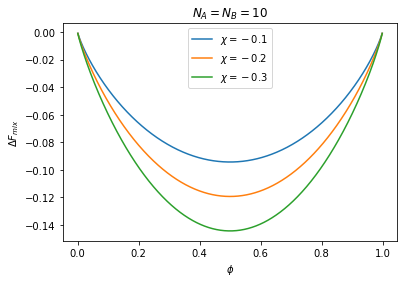

In [2]:
x = np.linspace(0.001,0.999,1000)
plt.figure()
plt.title('$N_A=N_B=10$')
plt.plot(x,F_mix(x,10,10,-0.1,1.0),label='$\chi=-0.1$')
plt.plot(x,F_mix(x,10,10,-0.2,1.0),label='$\chi=-0.2$')
plt.plot(x,F_mix(x,10,10,-0.3,1.0),label='$\chi=-0.3$')
plt.xlabel('$\phi$')
plt.ylabel('$\Delta F_{mix}$')
plt.legend()
plt.show()

## Free energy with N<sub>A</sub>>N<sub>B</sub> and  𝜒<0 

Again, we see one minimum, but not in the middle (because $N_A \neq N_B$), so we expect one phase.

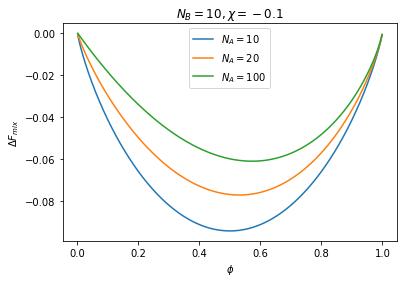

In [3]:
plt.figure()
plt.title('$N_B=10, \chi=-0.1$')
plt.plot(x,F_mix(x,10,10,-0.1,1.0),label='$N_A=10$')
plt.plot(x,F_mix(x,20,10,-0.1,1.0),label='$N_A=20$')
plt.plot(x,F_mix(x,1000,10,-0.1,1.0),label='$N_A=100$')
plt.xlabel('$\phi$')
plt.ylabel('$\Delta F_{mix}$')
plt.legend()
plt.show()

## Free energy with N<sub>A</sub>=N<sub>B</sub> and  𝜒>0 

Because $\chi>0 $ we expect that we might see two minima, e.g. phase separation. The two highest $\chi$ values do show two minima, the other ones one minimum. It's difficult to tell for the green ($\chi=0.2$) curve.   

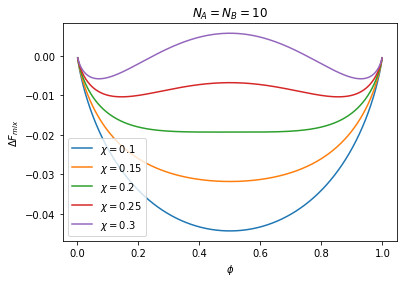

In [4]:
plt.figure()
plt.title('$N_A=N_B=10$')
plt.plot(x,F_mix(x,10,10,0.1,1.0),label='$\chi=0.1$')
plt.plot(x,F_mix(x,10,10,0.15,1.0),label='$\chi=0.15$')
plt.plot(x,F_mix(x,10,10,0.2,1.0),label='$\chi=0.2$')
plt.plot(x,F_mix(x,10,10,0.25,1.0),label='$\chi=0.25$')
plt.plot(x,F_mix(x,10,10,0.3,1.0),label='$\chi=0.3$')
plt.xlabel('$\phi$')
plt.ylabel('$\Delta F_{mix}$')
plt.legend()
plt.show()

## Free energy with N<sub>A</sub>>N<sub>B</sub> and  𝜒>0 

Same as above, but the curves are not symmetrical, e.g. the minima are not at the same height. 

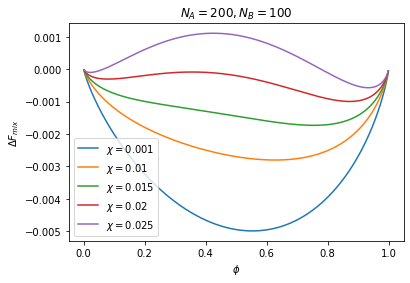

In [5]:
plt.figure()
plt.title('$N_A=200, N_B=100$')
plt.plot(x,F_mix(x,200,100,0.001,1.0),label='$\chi=0.001$')
plt.plot(x,F_mix(x,200,100,0.01,1.0),label='$\chi=0.01$')
plt.plot(x,F_mix(x,200,100,0.015,1.0),label='$\chi=0.015$')
plt.plot(x,F_mix(x,200,100,0.02,1.0),label='$\chi=0.02$')
plt.plot(x,F_mix(x,200,100,0.025,1.0),label='$\chi=0.025$')
plt.xlabel('$\phi$')
plt.ylabel('$\Delta F_{mix}$')
plt.legend(loc='lower left')
plt.show()

## Interactive Flory Huggins free energy plotter

You can change the values for chain lengths and $\chi$ using the sliders and plot the resulting free energy here. You need to click the "run interact" button to refresh the plot with your new values. 

In [14]:
NA = ipw.widgets.IntSlider(
    value=100,
    min=1,
    max=300,
    step=1,
    description='$N_A$',
    disabled=False)

NB = ipw.widgets.IntSlider(
    value=100,
    min=1,
    max=300,
    step=1,
    description='$N_B$',
    disabled=False)

chi = ipw.widgets.FloatSlider(
    value=0.02,
    min=-0.1,
    max=0.5,
    step=0.001,
    description='$\chi$',
    disabled=False)


def g2(NA=100,NB=100,chi=0.001):
    f, ax1 = plt.subplots(1, 1)
    ax1.set_xlabel('$\phi$')
    ax1.set_ylabel('$\Delta F_{mix}$')
    x = np.linspace(0.001,0.999,1000)
    y = F_mix(x,NA,NB,chi,1)
    ax1.plot(x,y)
    plt.tight_layout()
    plt.show()
    
q = ipw.interactive(g2,{'manual': True}, NA=NA,NB=NB,chi=chi);
display(q)    

interactive(children=(IntSlider(value=100, description='$N_A$', max=300, min=1), IntSlider(value=100, descript…

## Common tangent construction

Now we would like to find the phase boundaries from the free energy. We can use the common tanget construction for that. You can use the "show code" button at the top of this notebook to see the code and how one can solve the tangent construction nummerically in python. 

The red dots correspond to the binodal ($\phi'$ and $\phi''$) and the green dots ($\phi_{sp}'$ and $\phi_{sp}''$) to the spinodal.

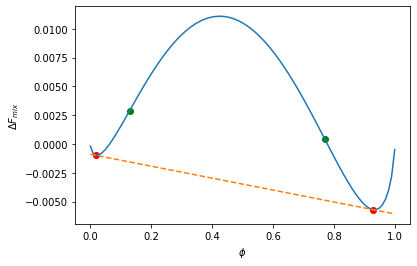

In [15]:
from sympy import Symbol, nsolve, nonlinsolve, log 
import sympy
import mpmath
mpmath.mp.dps = 15

def solve_tangent(NA,NB,chi,kT):
    x1 = Symbol('x1')
    x2 = Symbol('x2')
    y1 = Symbol('y1')
    y2 = Symbol('y2')

    def F_mix_s(phi,NA,NB,chi,kT):
        return kT*(chi*phi*(1.-phi) + phi/NA*log(phi) + (1.-phi)/NB*log(1-phi))

    def d_F_mix_s(phi,NA,NB,chi,kT):
        return kT*(chi*(1.-2*phi) + 1/NA*log(phi)+ 1/NA -1/NB -1/NB*log(1-phi))

    try:
        sol = nsolve((
        y1-F_mix_s(x1,NA,NB,chi,kT),
        y2-F_mix_s(x2,NA,NB,chi,kT), 
        d_F_mix_s(x1,NA,NB,chi,kT)-d_F_mix_s(x2,NA,NB,chi,kT),
        d_F_mix_s(x1,NA,NB,chi,kT)-(y2-y1)/(x2-x1)),
        (x1,x2,y1,y2),(0.01,0.99,-0.01,-0.01))
    except: 
        sol=[np.nan,np.nan,np.nan,np.nan]
    return sol 

def solve_binodal(NA,NB,chi,kT):
    x1 = Symbol('x1')
    x2 = Symbol('x2')
    y1 = Symbol('y1')
    y2 = Symbol('y2')

    def d_d_F_mix_s(phi,NA,NB,chi,kT):
        return -2*chi + 1./(NA*phi) + 1./(NB - NB*phi)

    def F_mix_s(phi,NA,NB,chi,kT):
        return kT*(chi*phi*(1.-phi) + phi/NA*log(phi) + (1.-phi)/NB*log(1-phi))
    
    try:
        sol = nsolve((
        d_d_F_mix_s(x1,NA,NB,chi,kT),
        d_d_F_mix_s(x2,NA,NB,chi,kT),
        y1-F_mix_s(x1,NA,NB,chi,kT),
        y2-F_mix_s(x2,NA,NB,chi,kT)), 
        (x1,x2,y1,y2),(1./4.,3./4.,-0.01,-0.01))
    except:
        sol=[np.nan,np.nan,np.nan,np.nan]
    return sol 

def line(x,x1,x2,y1,y2):
    m = (y1-y2)/(x1-x2)
    return  m*(x-x1)+y1

NA=20
NB=10
chi = 0.25
kT = 1.0
sol = solve_tangent(NA,NB,chi,kT)
binodal = solve_binodal(NA,NB,chi,kT)

x = np.linspace(0.001,0.999,100)
plt.figure()
plt.plot(x,F_mix(x,NA,NB,chi,kT))
plt.scatter(sol[0],sol[2],c='red')
plt.scatter(sol[1],sol[3],c='red')

plt.scatter(binodal[0],binodal[2],c='green')
plt.scatter(binodal[1],binodal[3],c='green')

plt.plot(x,line(x,*sol),linestyle='--')
plt.xlabel('$\phi$')
plt.ylabel('$\Delta F_{mix}$')
plt.show()


## Interactive common tangent solver/plotter 

Same as above but you can change the values using the sliders. If there are no two minium, only the free energy will be displayed.

In [8]:
from sympy import Symbol, nsolve, nonlinsolve, log 
import sympy
import mpmath
mpmath.mp.dps = 15

def solve_tangent(NA,NB,chi,kT):
    x1 = Symbol('x1')
    x2 = Symbol('x2')
    y1 = Symbol('y1')
    y2 = Symbol('y2')

    def F_mix_s(phi,NA,NB,chi,kT):
        return kT*(chi*phi*(1.-phi) + phi/NA*log(phi) + (1.-phi)/NB*log(1-phi))

    def d_F_mix_s(phi,NA,NB,chi,kT):
        return kT*(chi*(1.-2*phi) + 1/NA*log(phi)+ 1/NA -1/NB -1/NB*log(1-phi))

    try:
        sol = nsolve((
        y1-F_mix_s(x1,NA,NB,chi,kT),
        y2-F_mix_s(x2,NA,NB,chi,kT), 
        d_F_mix_s(x1,NA,NB,chi,kT)-d_F_mix_s(x2,NA,NB,chi,kT),
        d_F_mix_s(x1,NA,NB,chi,kT)-(y2-y1)/(x2-x1)),
        (x1,x2,y1,y2),(0.01,0.99,-0.01,-0.01))
    except: 
        sol=[np.nan,np.nan,np.nan,np.nan]
    return sol 

def solve_binodal(NA,NB,chi,kT):
    x1 = Symbol('x1')
    x2 = Symbol('x2')
    y1 = Symbol('y1')
    y2 = Symbol('y2')

    def d_d_F_mix_s(phi,NA,NB,chi,kT):
        return -2*chi + 1./(NA*phi) + 1./(NB - NB*phi)

    def F_mix_s(phi,NA,NB,chi,kT):
        return kT*(chi*phi*(1.-phi) + phi/NA*log(phi) + (1.-phi)/NB*log(1-phi))
    
    try:
        sol = nsolve((
        d_d_F_mix_s(x1,NA,NB,chi,kT),
        d_d_F_mix_s(x2,NA,NB,chi,kT),
        y1-F_mix_s(x1,NA,NB,chi,kT),
        y2-F_mix_s(x2,NA,NB,chi,kT)), 
        (x1,x2,y1,y2),(1./4.,3./4.,-0.01,-0.01))
    except:
        sol=[np.nan,np.nan,np.nan,np.nan]
    return sol 

def line(x,x1,x2,y1,y2):
    m = (y1-y2)/(x1-x2)
    return  m*(x-x1)+y1


NA2 = ipw.widgets.IntSlider(
    value=20,
    min=10,
    max=30,
    step=1,
    description='$N_A$',
    disabled=False)

NB2 = ipw.widgets.IntSlider(
    value=10,
    min=5,
    max=30,
    step=1,
    description='$N_B$',
    disabled=False)

chi2 = ipw.widgets.FloatSlider(
    value=0.25,
    min=-0.1,
    max=0.5,
    step=0.001,
    description='$\chi$',
    disabled=False)


def g3(NA=100,NB=100,chi=0.001):

    kT = 1.0
    sol = solve_tangent(NA,NB,chi,kT)
    binodal = solve_binodal(NA,NB,chi,kT)

    x = np.linspace(0.001,0.999,100)
    
    f, (ax1,ax2) = plt.subplots(1, 2)
    ax1.plot(x,F_mix(x,NA,NB,chi,kT))
    ax1.scatter(sol[0],sol[2],c='red')
    ax1.scatter(sol[1],sol[3],c='red')

    ax1.scatter(binodal[0],binodal[2],c='green')
    ax1.scatter(binodal[1],binodal[3],c='green')

    ax1.plot(x,line(x,*sol),linestyle='--')
    ax1.set_xlabel('$\phi$')
    ax1.set_ylabel('$\Delta F_{mix}$')
    
    ax2.scatter(sol[0],chi,c='red')
    ax2.scatter(sol[1],chi,c='red')
    ax2.scatter(binodal[0],chi,c='green')
    ax2.scatter(binodal[1],chi,c='green')
    
    ax2.set_xlabel('$\phi$')
    ax2.set_ylabel('$\chi$')
    plt.tight_layout()
    plt.show()
    
q = ipw.interactive(g3,{'manual': True}, NA=NA2,NB=NB2,chi=chi2);
display(q)    

interactive(children=(IntSlider(value=20, description='$N_A$', max=30, min=10), IntSlider(value=10, descriptio…

## Phase diagrams

Phase diagrams are generated by nummerically solving the common tangent construction for a range of $\chi$ values and recording the resulting $\phi$ values, e.g. taking the points from the right plot above and putting them all together into one plot. 

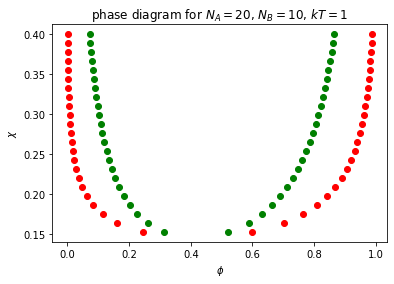

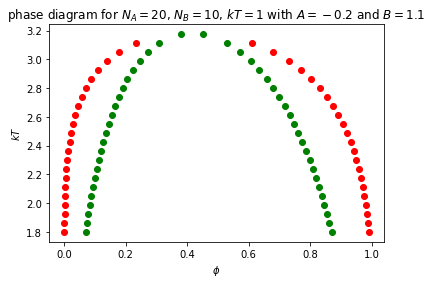

In [9]:
NA=20
NB=10
kT = 1.0
plt.figure()

for chi in np.linspace(0.13,0.4,25):
    sol = solve_tangent(NA,NB,chi,kT)
    binodal =  solve_binodal(NA,NB,chi,kT)
    plt.scatter(sol[0],chi,c='red')
    plt.scatter(sol[1],chi,c='red')
    plt.scatter(binodal[0],chi,c='green')
    plt.scatter(binodal[1],chi,c='green')
    
plt.xlabel('$\phi$')
plt.ylabel('$\chi$')
plt.title("phase diagram for $N_A=20$, $N_B=10$, $kT=1$")
plt.show()

NA=20
NB=10
A=-0.2
B=1.1
plt.figure()

for kT in np.linspace(1.8,3.3,25):
    chi = A + B/kT
    sol = solve_tangent(NA,NB,chi,kT)
    binodal =  solve_binodal(NA,NB,chi,kT)
    plt.scatter(sol[0],kT,c='red')
    plt.scatter(sol[1],kT,c='red')
    plt.scatter(binodal[0],kT,c='green')
    plt.scatter(binodal[1],kT,c='green')
    
plt.xlabel('$\phi$')
plt.ylabel('$kT$')
plt.title("phase diagram for $N_A=20$, $N_B=10$ with $A=-0.2$ and $B=1.1$")
plt.show()


## Binodal & Spinodal

Phase field computer simulation of nucleation and growth of FeCr alloy (https://www.youtube.com/watch?v=wHYfOAOt3vE&feature=youtu.be):

In [10]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/wHYfOAOt3vE?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


/Users/statt/.pyenv/versions/3.7.4/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


MD simulation of Iron solidification (https://www.nature.com/articles/srep13534):

In [11]:

# Youtube
HTML('<iframe width="560" height="315" src="https://www.nature.com/articles/srep13534" frameborder="0" allowfullscreen></iframe>')


Phase field computer simulation of spinodal decomposition (https://www.youtube.com/watch?v=Jr4wT6kavrY&feature=youtu.be):

In [12]:
# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Jr4wT6kavrY?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


Experimental movie of spinodal decomposition of a polymer solution (http://aarts.chem.ox.ac.uk/main/research/chpt9/movie1_sd.mpg
):

In [13]:
 HTML("""
    <video alt="test" controls>
        <source src="http://aarts.chem.ox.ac.uk/main/research/chpt9/movie1_sd.mpg" type="video/mp4">
    </video>
""")
    


## Phase diagram